# Extra Big Pic Creator

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as randn

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm as cm

GRAY = cm.get_cmap('gray', 256)

import sys
import os

In [2]:
def someWeirdThing(XXX,x0,x1,c1,c2,width,size):
    #x : value
    #center: location of the curve
    #width: width of the curve
    #height: minimum value added later
    XXX[x0,x1]+= size * np.exp(-(x0-c1)**2 / (2*width) ) * np.exp(-(x1-c2)**2 / (2*width) ) 
    
def castRect(XXX,x0,x1,y0,y1,value):
    XXX[x0:x1,y0:y1] = value
    
def randRect(XXX,x0,x1,y0,y1,value):
    for i in range(0,x1-x0):
        for j in range(0,y1-y0):
            if(randn.uniform(0,1) > 0.5):
                XXX[x0+i,y0+j] = value
                
def castRectHole(XXX,x0,x1,y0,y1,value):
    castRect(XXX,x0,x0+30,y0,y1,value)
    castRect(XXX,x1-30,x1,y0,y1,value)
    castRect(XXX,x0,x1,y0,y0+30,value)
    castRect(XXX,x0,x1,y1-30,y1,value)

In [3]:
s1,s2 = 4000,4000
extra_pic = np.ones((s1,s2))*110
extra_pic_add= np.zeros((s1,s2))
#background
for i in range(0,s1):
    for j in range(0,s2):
        someWeirdThing(extra_pic_add,i,j,4000,4000,400000,70)
for i in range(0,s1):
    for j in range(0,s2):
        someWeirdThing(extra_pic_add,i,j,0,0,400000,-70)
for i in range(0,s1):
    for j in range(0,s2):
        someWeirdThing(extra_pic_add,i,j,800,3200,40000,90)
for i in range(0,s1):
    for j in range(0,s2):
        someWeirdThing(extra_pic_add,i,j,3200,800,40000,90)
extra_pic = extra_pic + extra_pic_add

#holed rectangles
castRect(extra_pic,600,700,3300,3400,90)
castRect(extra_pic,3300,3400,600,700,90)
castRectHole(extra_pic,500,3500,500,3500,60)
castRectHole(extra_pic,500,700,500,700,60)
castRectHole(extra_pic,3300,3500,3300,3500,60)
castRectHole(extra_pic,500,700,3300,3500,60)
castRectHole(extra_pic,3300,3500,500,700,60)

        
#diagonal rectangles
for i in range(1,19):
    if (i % 2 == 1):
        castRect(extra_pic,i*200,(i+1)*200,i*200,(i+1)*200,60)
    if (i % 2 == 0):
        castRect(extra_pic,i*200,(i+1)*200,i*200,(i+1)*200,180)

np.savetxt("large_pic.txt",extra_pic,fmt="%d",header="4000 4000",delimiter=" ",comments="")
np.savetxt("../gpu-parallel/pics/large_pic.txt",extra_pic,fmt="%d",header="4000 4000",delimiter=" ",comments="")

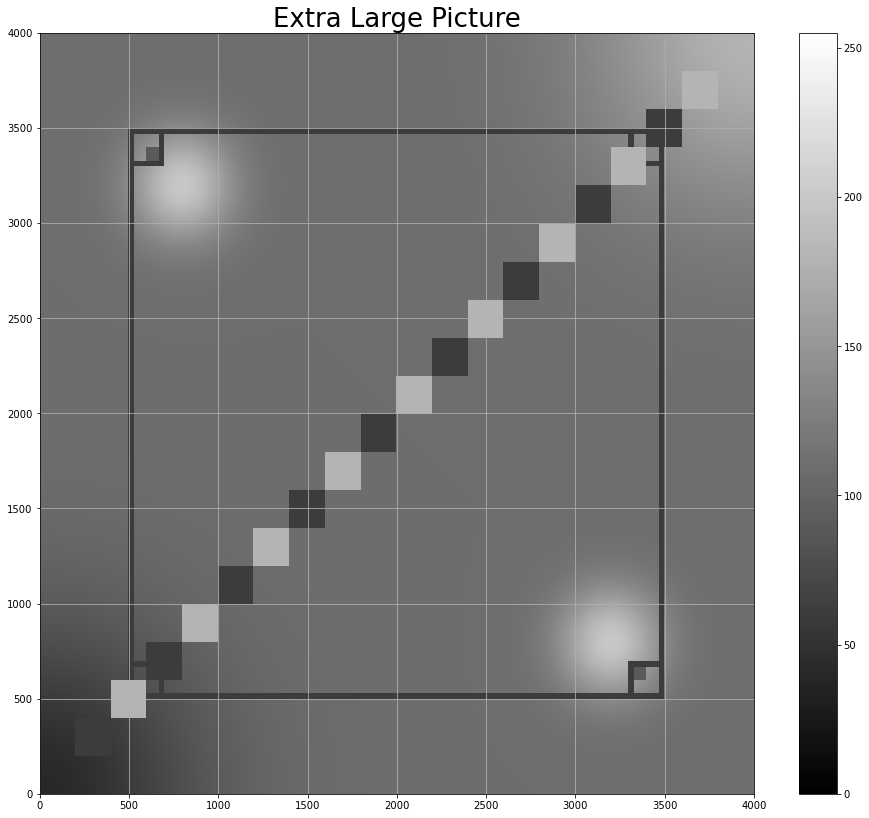

In [4]:
extra_pic = np.genfromtxt("large_pic.txt",dtype=int, skip_header=True,)
example_pic = extra_pic
fig, ax = plt.subplots(1,1,figsize=(16,14))
psm = ax.pcolormesh(example_pic.T, cmap=GRAY, rasterized=True, vmin=0, vmax=255)
ax.set_title("Extra Large Picture", fontsize=26)

fig.colorbar(psm, ax=ax)
plt.grid()
plt.savefig("pics_preview/large_pic.jpeg", format="jpeg", dpi=200)
plt.show()

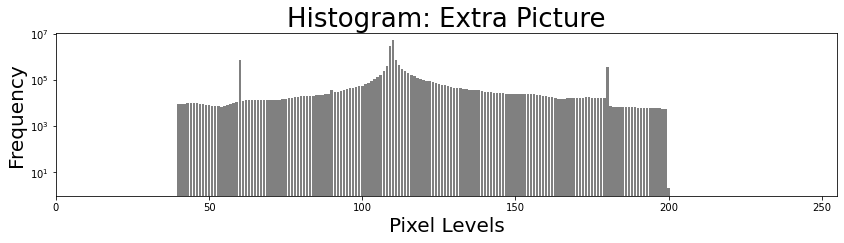

In [8]:
values,counts = np.unique(extra_pic,return_counts=True)

plt.figure(figsize=(14,3))
plt.title("Histogram: Extra Picture", fontsize=26)
plt.bar(values,counts, color="gray")

plt.xlim(0,255)
plt.xlabel("Pixel Levels", fontsize=20)
plt.ylabel("Frequency", fontsize=20)

plt.yscale('log')

fig.tight_layout()
plt.savefig("pics_preview/large_pic_hist.jpeg", format="jpeg", dpi=200, bbox_inches="tight")
plt.show()

As it somehow could have been foreseen, yes, python core cannot handle such big data to represent. So what I have to do is create the hist file from the c/c++ source code programs, as they are very fast compared to this.

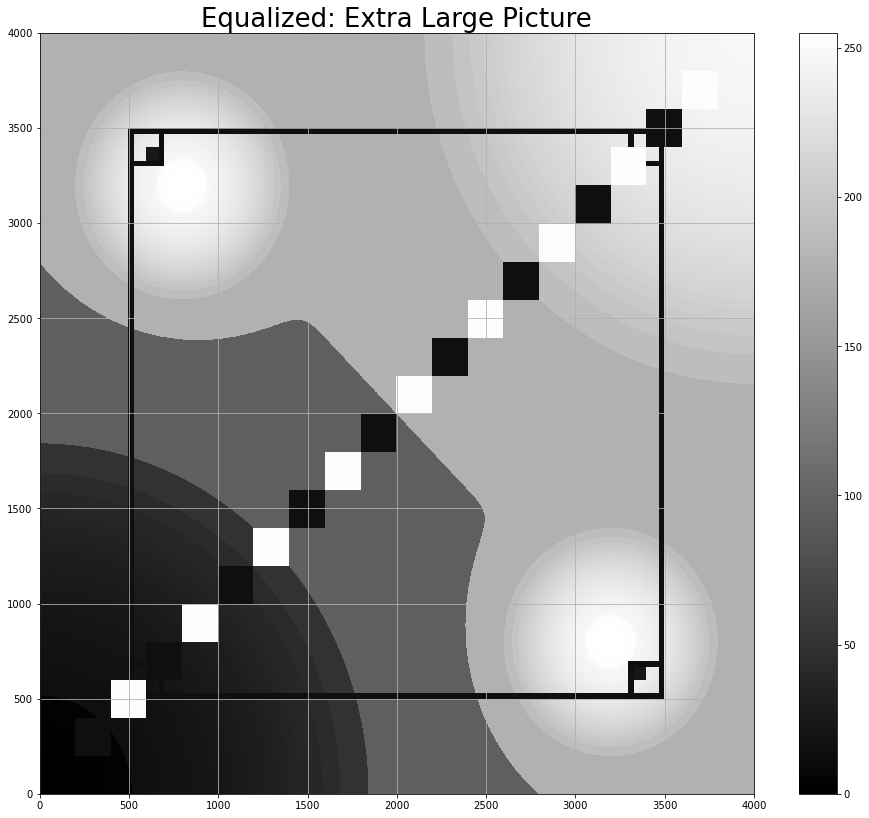

In [12]:
eq_extra_pic = np.genfromtxt("../gpu-parallel/output/large_pic.txt",dtype=int, skip_header=True,)
example_pic = extra_pic
fig, ax = plt.subplots(1,1,figsize=(16,14))
psm = ax.pcolormesh(example_pic.T, cmap=GRAY, rasterized=True, vmin=0, vmax=255)
ax.set_title("Equalized: Extra Large Picture", fontsize=26)

fig.colorbar(psm, ax=ax)
plt.grid()
plt.savefig("pics_preview/eq_large_pic.jpeg", format="jpeg", dpi=200)
plt.show()

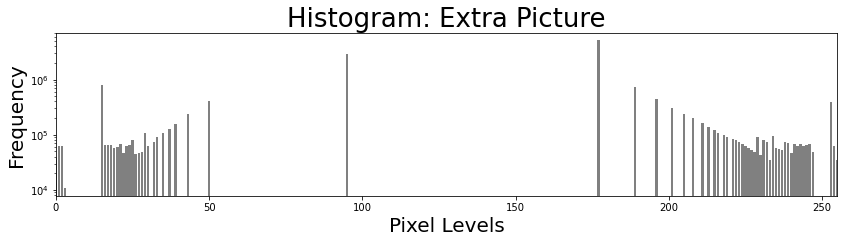

In [13]:
values,counts = np.unique(eq_extra_pic,return_counts=True)

plt.figure(figsize=(14,3))
plt.title("Histogram: Extra Picture", fontsize=26)
plt.bar(values,counts, color="gray")

plt.xlim(0,255)
plt.xlabel("Pixel Levels", fontsize=20)
plt.ylabel("Frequency", fontsize=20)

plt.yscale('log')

fig.tight_layout()
plt.savefig("pics_preview/large_pic_hist.jpeg", format="jpeg", dpi=200, bbox_inches="tight")
plt.show()